In [ ]:
!pip install tensorflow

C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 25ms/step - accuracy: 0.9129 - loss: 0.2852 - val_accuracy: 0.9878 - val_loss: 0.0388
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9877 - loss: 0.0413 - val_accuracy: 0.9881 - val_loss: 0.0354
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 0.9902 - val_loss: 0.0284
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9909 - val_loss: 0.0273
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 24ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9892 - val_loss: 0.0341
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9865 - loss: 0.0427
Test Accuracy: 0.9891999959945679


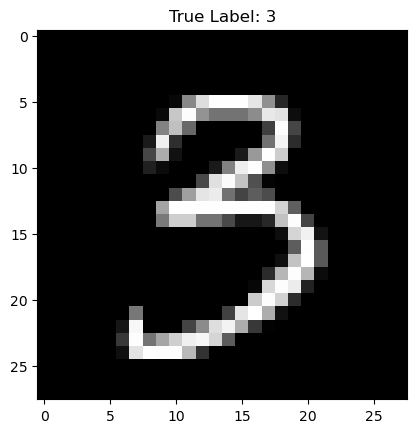

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted Label: 3


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values to 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build a simple CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Predict a random sample
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index], cmap='gray')
plt.title(f"True Label: {y_test[index]}")
plt.show()

prediction = np.argmax(model.predict(X_test[index].reshape(1, 28, 28, 1)))
print("Predicted Label:", prediction)